# Map the noto pictures to their corresponding emoji

In [42]:
import colorsys
import os
import re
import pickle

import numpy as np
from PIL import Image
from tqdm import tqdm

## Loading emojis

In [2]:
emoji_picture_paths = os.listdir('data/noto/')

In [3]:
def emoji_picture_name_to_unicode(emoji_pic_name):
    """Converts an emoji picture name to a unicode string"""
    # Remove the file extension
    emoji_pic_name = emoji_pic_name.split('.')[0]
    # Split the name into parts
    parts = emoji_pic_name.split('_')
    # Convert the parts to unicode
    unicode_parts = [chr(int(part.replace('u', ''), 16)) for part in parts[1:]]
    # Join the parts and return
    return ''.join(unicode_parts)

In [4]:
emojis = [emoji_picture_name_to_unicode(emoji_pic_name) for emoji_pic_name in emoji_picture_paths]

## Getting average emoji color

In [5]:
def get_average_color(emoji_picture_path):
    """Returns the average color of an emoji picture"""
    
    img = Image.open(emoji_picture_path)

    rs, gb, bs = [], [], []

    # iterate over the pixels of img to get the average color
    width, height = img.size
    for i in range(width):
        for j in range(height):
            r, g, b, a = img.getpixel((i, j))
            rs.append(r * a / 255)
            gb.append(g * a / 255)
            bs.append(b * a / 255)

    # get the average color
    r = int(sum(rs) / len(rs))
    g = int(sum(gb) / len(gb))
    b = int(sum(bs) / len(bs))

    return r, g, b

In [44]:
try:
    with open('data/noto_avg_colors', 'rb') as f:
        average_colors = pickle.load(f)
except FileNotFoundError:
    average_colors = [get_average_color('data/noto/' + png) for png in tqdm(emoji_picture_paths, desc='Computing average emoji colors')]
    with open('data/noto_avg_colors', 'wb') as f:
        pickle.dump(average_colors, f)


Loaded saved data from 'data/noto_avg_colors'


In [24]:
average_hls = [colorsys.rgb_to_hls(*color) for color in tqdm(average_colors, desc='Converting average emoji colours to HLS')]

Converting average emoji colours to HLS: 100%|██████████| 3458/3458 [00:00<00:00, 1796593.98it/s]


In [36]:
average_hls_sorted_i = np.argsort([h for h, l, s in average_hls])

## Display hues

In [166]:
def get_indexes_sorted_by_hue(
    rgbs: list[tuple[int, int, int]],
    saturation_range: tuple[float, float] = None,
    lightness_range: tuple[float, float] = None,
) -> list[int]:
    """Returns the indexes of the colors sorted by hue with optional saturation filtering"""
    hlss = [colorsys.rgb_to_hls(*rgb) for rgb in rgbs]
    sorted_i = np.argsort([h for h, l, s in hlss])
    if saturation_range is not None:
        sorted_i = [i for i in sorted_i if saturation_range[0] <= hlss[i][2] <= saturation_range[1]]
    if lightness_range is not None:
        sorted_i = [i for i in sorted_i if lightness_range[0] <= hlss[i][1] <= lightness_range[1]]
    return sorted_i

In [167]:
def display_colors(
    rgbs: list[tuple[int, int, int]],
    saturation_range: tuple[float, float] = None,
    lightness_range: tuple[float, float] = None
) -> None:
    """Displays a sorted image of the colors"""
    sorted_i = get_indexes_sorted_by_hue(rgbs, saturation_range=saturation_range, lightness_range=lightness_range)
    
    if not any([saturation_range, lightness_range]):
        print(f'{len(sorted_i)} colors.')
    elif all([saturation_range, lightness_range]):
        print(f'{len(sorted_i)} colors with saturation in range {saturation_range} and lightness in range {lightness_range}.')
    elif saturation_range is not None:
        print(f'{len(sorted_i)} colors with saturation in range {saturation_range}.')
    elif lightness_range is not None:
        print(f'{len(sorted_i)} colors with lightness in range {lightness_range}.')

    width = int(len(sorted_i) / 7)
    img = Image.new('RGB', (len(sorted_i), width), color='white')
    for x, i in enumerate(sorted_i):
        for y in range(width):
            img.putpixel((x, y), rgbs[i])
    display(img)

3458 colors.


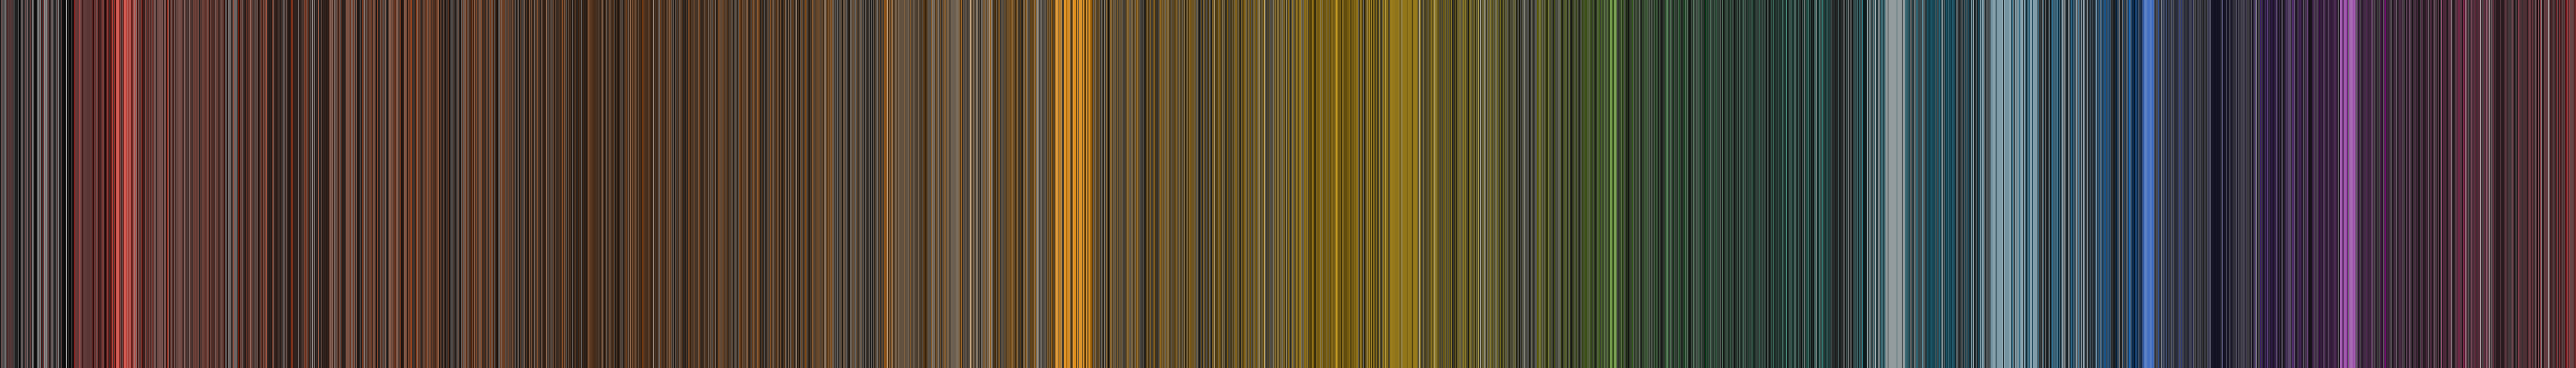

In [168]:
display_colors(average_colors)

In [163]:
min_hue = min(e[2] for e in average_hls)
max_hue = max(e[2] for e in average_hls)

hues_thresholds = np.linspace(min_hue, max_hue, 10)[::-1]

min_lightness = min(e[1] for e in average_hls)
max_lightness = max(e[1] for e in average_hls)

lightness_thresholds = np.linspace(min_lightness, max_lightness, 10)

410 colors with saturation in range (-2, -0.38) and lightness in range (70, 255).


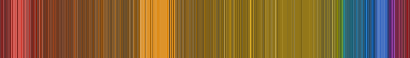

In [169]:
display_colors(
    average_colors,
    saturation_range=(-2, -.38),
    lightness_range=(70, 255)
)

410 colors with saturation in range (-2, -0.38) and lightness in range (70, 255).


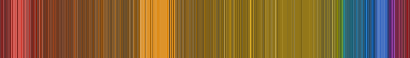

In [173]:
saturation_range = (-2, -.38)
lightness_range = (70, 255)

display_colors(
    average_colors,
    saturation_range=saturation_range,
    lightness_range=lightness_range
)

rainbow = []
for i in get_indexes_sorted_by_hue(average_colors, saturation_range=saturation_range, lightness_range=lightness_range):
    rainbow.append(emojis[i])

with open(f'outputs/noto/rainbow_S_{saturation_range[0]}_{saturation_range[1]}_L_{lightness_range[0]}_{lightness_range[1]}.txt', 'w') as f:
    f.write(''.join(rainbow))

3458 colors.


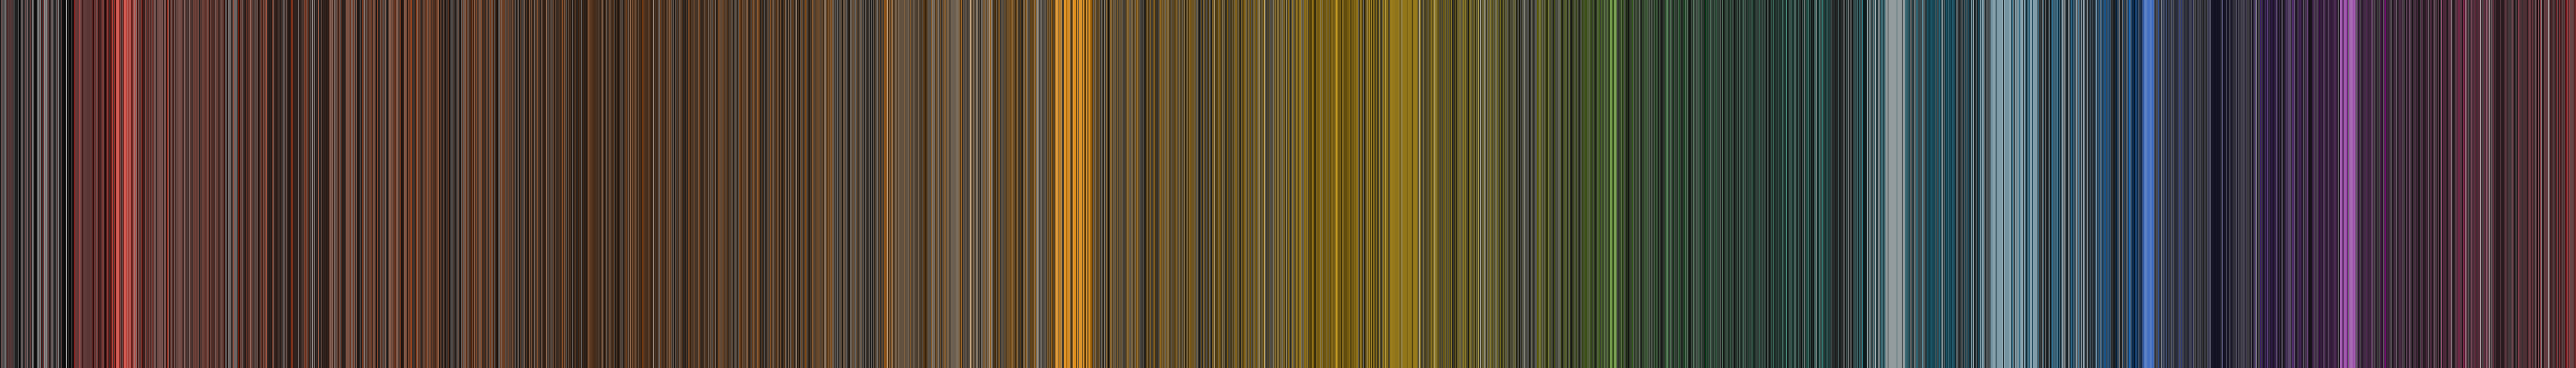

In [174]:
saturation_range = None
lightness_range = None

display_colors(
    average_colors,
    saturation_range=saturation_range,
    lightness_range=lightness_range
)

rainbow = []
for i in get_indexes_sorted_by_hue(average_colors, saturation_range=saturation_range, lightness_range=lightness_range):
    rainbow.append(emojis[i])

with open(f'outputs/noto/rainbow_all_emojis.txt', 'w') as f:
    f.write(''.join(rainbow))

958 colors with lightness in range (85, 255).


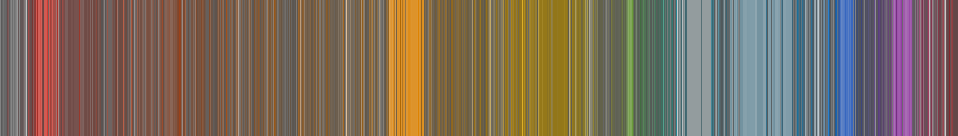

In [180]:
saturation_range = None
lightness_range = (85, 255)

display_colors(
    average_colors,
    saturation_range=saturation_range,
    lightness_range=lightness_range
)

rainbow = []
for i in get_indexes_sorted_by_hue(average_colors, saturation_range=saturation_range, lightness_range=lightness_range):
    rainbow.append(emojis[i])

with open(f'outputs/noto/rainbow_S_All_L_{lightness_range[0]}_{lightness_range[1]}.txt', 'w') as f:
    f.write(''.join(rainbow))